Importing Libraries and Reading Data


In [80]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error

In [18]:
df = pd.read_csv('train.csv')
df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


Preprocessing Data

In [19]:
df.isna().any()

date     False
store    False
item     False
sales    False
dtype: bool

In [20]:
df.describe()

,store,item,sales
count,913000.000000,913000.000000,913000.000000
mean,5.500000,25.500000,52.250287
std,2.872283,14.430878,28.801144
min,1.000000,1.000000,0.000000
25%,3.000000,13.000000,30.000000
50%,5.500000,25.500000,47.000000
75%,8.000000,38.000000,70.000000
max,10.000000,50.000000,231.000000


Converting date from yyyy-mm-dd to yyyy-mm

In [21]:
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].dt.strftime('%Y-%m')
df.head()

,date,store,item,sales
0,2013-01,1,1,13
1,2013-01,1,1,11
2,2013-01,1,1,14
3,2013-01,1,1,13
4,2013-01,1,1,10


In [22]:
df_monthly = df.groupby(["date","item","store"]).sales.sum().reset_index()
df_monthly.head()

,date,item,store,sales
0,2013-01,1,1,328
1,2013-01,1,2,486
2,2013-01,1,3,453
3,2013-01,1,4,388
4,2013-01,1,5,294


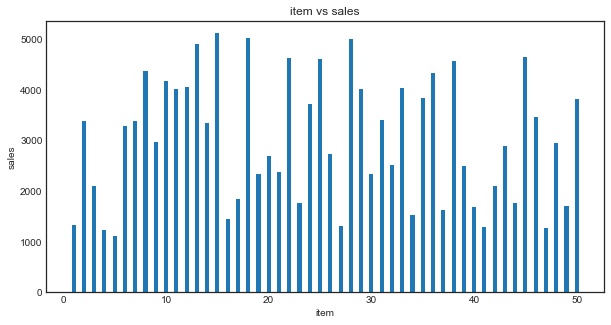

In [23]:
fig = plt.figure(figsize = (10, 5))
plt.bar(df_monthly['item'],df_monthly['sales'],width = 0.4)
plt.xlabel("item")
plt.ylabel("sales")
plt.title("item vs sales")
plt.show()

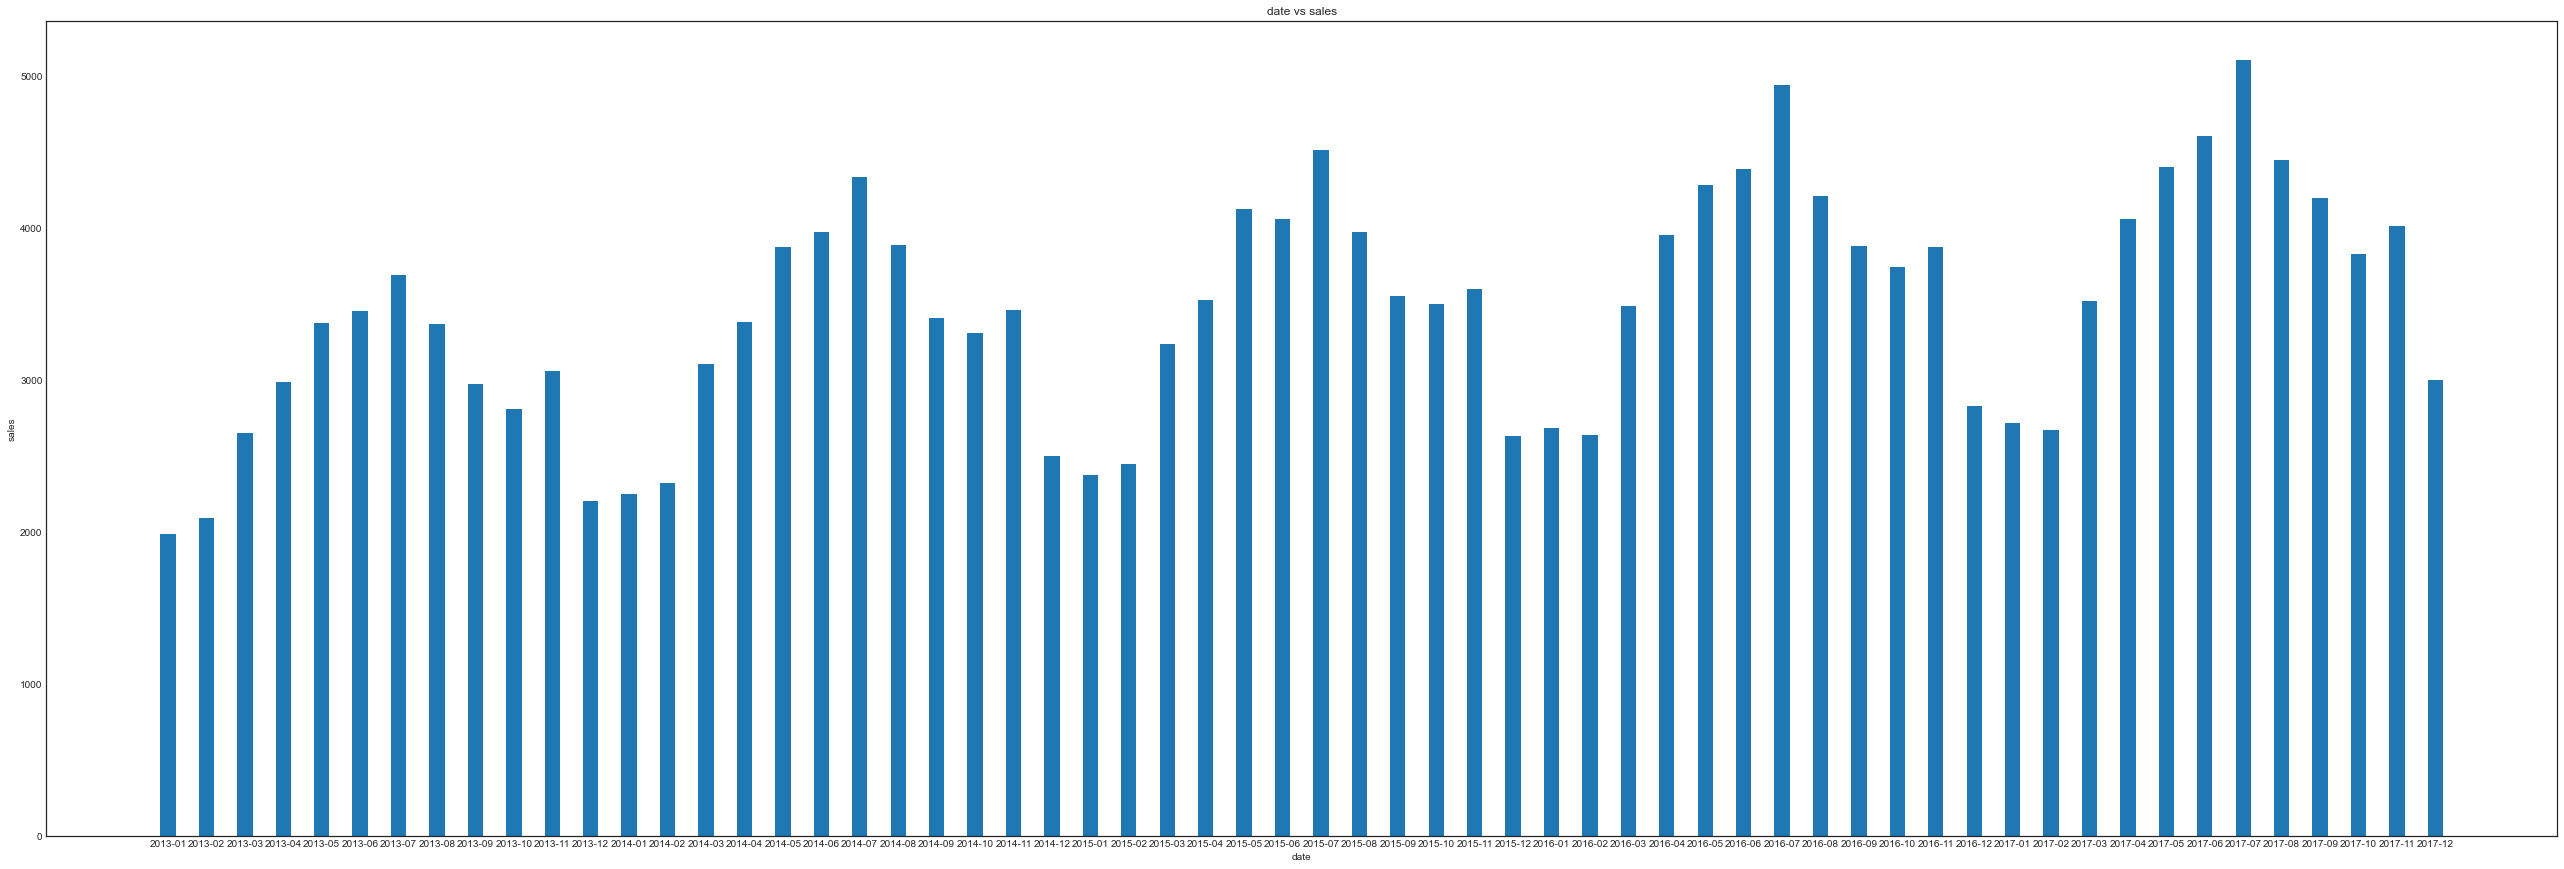

In [24]:
fig = plt.figure(figsize = (45, 15))
plt.bar(df_monthly['date'],df_monthly['sales'],width=0.4)
plt.xlabel("date")
plt.ylabel("sales")
plt.title("date vs sales")
plt.show()

converting date to mm format


In [25]:
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].dt.strftime('%m')
df.head()

,date,store,item,sales
0,01,1,1,13
1,01,1,1,11
2,01,1,1,14
3,01,1,1,13
4,01,1,1,10


In [26]:
df_mm = df.groupby(["date","item","store"]).sales.sum().reset_index()
df_mm.head()

,date,item,store,sales
0,01,1,1,2125
1,01,1,2,2956
2,01,1,3,2637
3,01,1,4,2411
4,01,1,5,1763


In [27]:
df_mm.shape

(6000, 4)

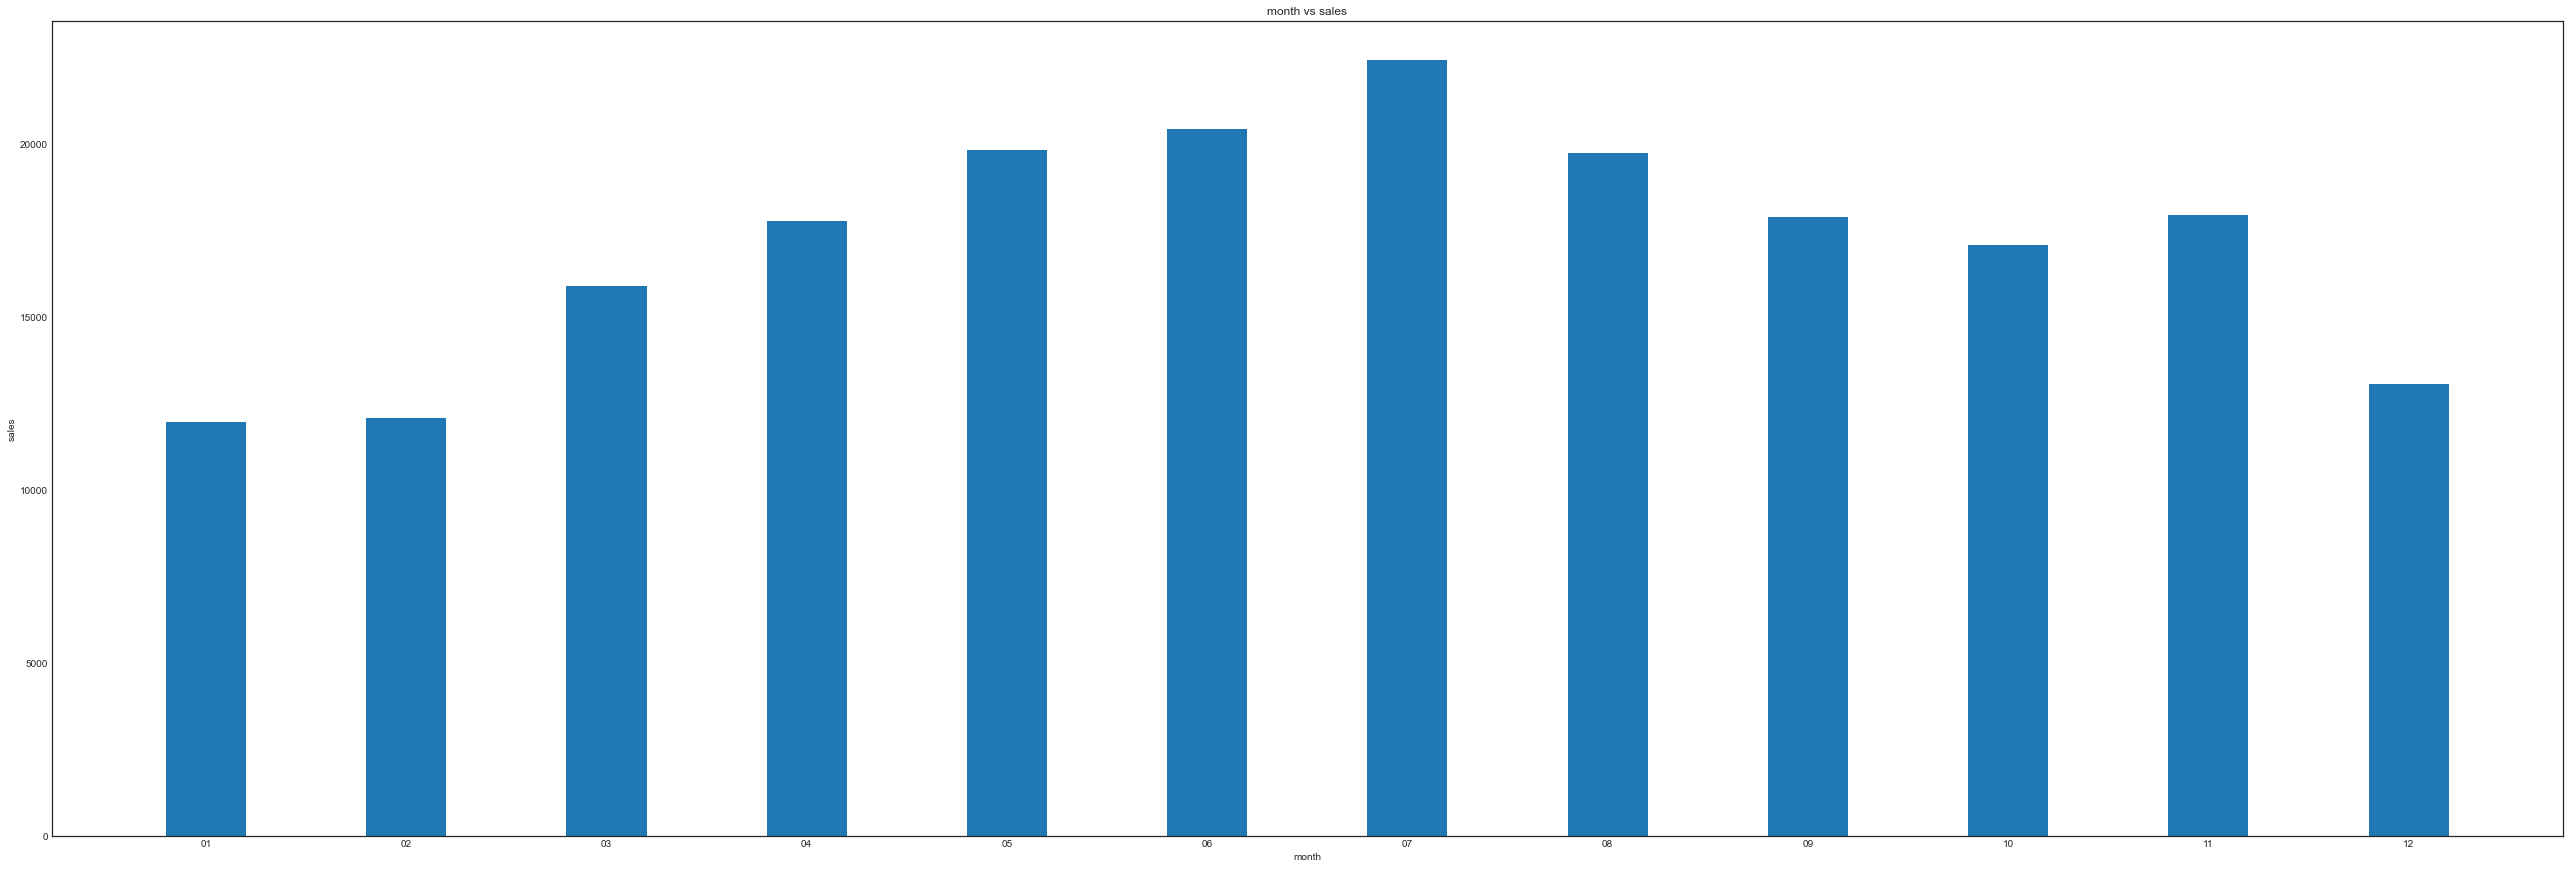

In [28]:
fig = plt.figure(figsize = (45, 15))
plt.bar(df_mm['date'],df_mm['sales'],width=0.4)
plt.xlabel("month")
plt.ylabel("sales")
plt.title("month vs sales")
plt.show()  

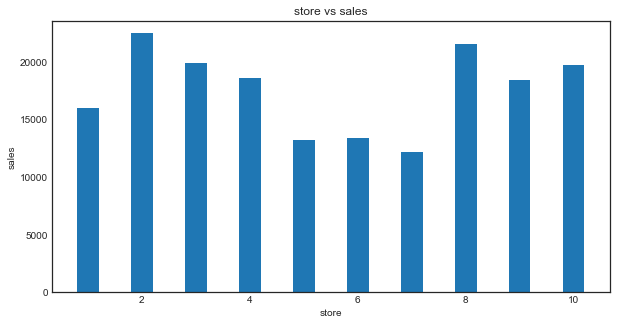

In [29]:
fig = plt.figure(figsize = (10, 5))
plt.bar(df_mm['store'],df_mm['sales'],width = 0.4)
plt.xlabel("store")
plt.ylabel("sales")
plt.title("store vs sales")
plt.show()

In [30]:
df_monthly.skew()

C:\Users\SOWMIH~1\AppData\Local\Temp/ipykernel_32116/16408273.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_monthly.skew()


item     0.000000
store    0.000000
sales    0.743533
dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x2bea182fb50>,
 'caps': [<matplotlib.lines.Line2D at 0x2be809e07f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2bea182f970>],
 'medians': [<matplotlib.lines.Line2D at 0x2be809d4eb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2be809fc460>],
 'means': []}

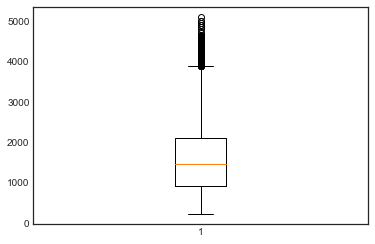

In [31]:
plt.boxplot(df_monthly['sales'], notch=None, vert=None, patch_artist=None, widths=None)

In [32]:
df_monthly = df_monthly[df_monthly['sales']<=4000].reset_index().drop('index', axis=1)

In [33]:
df_monthly.shape

(29828, 4)

In [34]:
df_monthly.head(10)

,date,item,store,sales
0,2013-01,1,1,328
1,2013-01,1,2,486
2,2013-01,1,3,453
3,2013-01,1,4,388
4,2013-01,1,5,294
5,2013-01,1,6,287
6,2013-01,1,7,256
7,2013-01,1,8,431
8,2013-01,1,9,424
9,2013-01,1,10,447


In [35]:
df_monthly = pd.get_dummies(data=df_monthly, drop_first=True, columns=['item','store'])
df_monthly.head()

,date,sales,item_2,item_3,item_4,item_5,item_6,item_7,item_8,item_9,...,item_50,store_2,store_3,store_4,store_5,store_6,store_7,store_8,store_9,store_10
0,2013-01,328,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2013-01,486,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2013-01,453,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,2013-01,388,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2013-01,294,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [79]:
test = pd.read_csv('test.csv')

In [92]:
import xgboost as xgb

dtrain = xgb.DMatrix(data=df[['store', 'item']],
                     label=df['sales'])

params = {'max_depth':3,
              'eta':0.2,
              'silent':1,
              'subsample':1}
num_rounds = 1500

xg_depth_20 = xgb.train(params=params, dtrain=dtrain,num_boost_round=num_rounds)

KeyError: "None of [Index(['store', 'item'], dtype='object')] are in the [columns]"

In [82]:
dtest = xgb.DMatrix(data=test[['store', 'item']])

train_pred = xg_depth_20.predict(dtrain)     
test['sales'] =  xg_depth_20.predict(dtest)  

In [83]:
mse_train = mean_squared_error(df['sales'], train_pred)                  
mse_test = mean_squared_error(df.sales[0:45000], test['sales'])
print('MSE Train: {:.3f}. MSE Test: {:.3f}'.format(mse_train, mse_test))

MSE Train: 252.649. MSE Test: 1231.341


In [89]:
# Create DMatrix on train data
dtrain = xgb.DMatrix(data=df[['store', 'item']],
                     label=df['sales'])

# Define xgboost parameters
params = {'objective': 'reg:linear',
          'max_depth':3,
            'eta':0.2,
            'silent':1,
            'subsample':1}

# Train xgboost model
xg_depth_20 = xgb.train(params=params, dtrain=dtrain)

[18:25:29] WARNING: c:\ci\xgboost-split_1619728435298\work\src\objective\regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[18:25:29] WARNING: ..\src\learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [90]:
dtest = xgb.DMatrix(data=test[['store', 'item']])

train_pred = xg_depth_20.predict(dtrain)     
test['sales'] =  xg_depth_20.predict(dtest)          

In [91]:

mse_train = mean_squared_error(df['sales'], train_pred)                  
mse_test = mean_squared_error(df.sales[0:45000], test['sales'])
print('MSE Train: {:.3f}. MSE Test: {:.3f}'.format(mse_train, mse_test))

MSE Train: 592.772. MSE Test: 662.950
